This project aims to generate and build a model which predicts whether the paitent has heart disease or not based on their medical attributes.

we will go through the following steps to build one.
1. Problem definition
2. Data 
3. Evaluation
4. Features
5. Modelling
6. Experimentation

1. Problem defination 
classification
given params whether heart disease yes or no.


2. data 

can get from kaggle
or the opensource uci dataset get info about each params

3. evaluation
if we can reach 95% during the proof of concept we can pursue

4. Features

from 76 we  are only using 14 
**create a data dictionary**

1. (age) : age in years
2. (sex) : sex (1 = male; 0 = female)
3. (cp)  : chest pain type --V1:typical angina --V2: atypical angina --V3: non-anginal pain --V4: asymptomatic
4. (trestbps) : resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) : serum cholestoral in mg/dl
6. (fbs) :(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg): resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) : maximum heart rate achieved
9. (exang) : exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) : ST depression induced by exercise relative to rest
11. (slope) : the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
12. (ca) : number of major vessels (0-3) colored by flourosopy
13. (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute) : diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing


#Preparing the tools

we are going to matplot lib pandas and manipulatin

In [5]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import all the tools we need

#Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want them in outr notebook
%matplotlib inline 

#models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


Load data

In [5]:
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data anlysis or EDA)

WE NEED TO GET FAMILIAR WITH THE DATA BY FINDING OUT MORE ABOUT IT.

1. What are the questions you are trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. how can you add, change or remove features to get more out of your data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

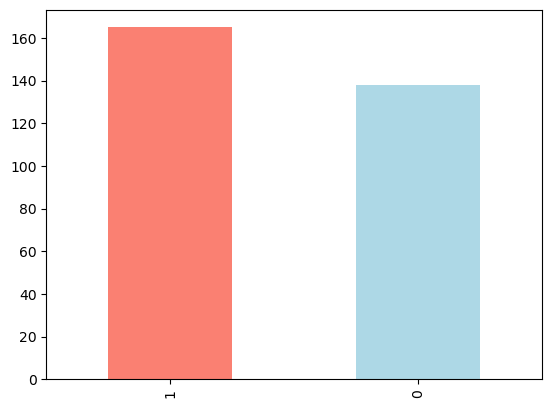

In [11]:
df["target"].value_counts().plot(kind="bar", color = ["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# heart disease freq accords to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
df["target"].value_counts()


1    165
0    138
Name: target, dtype: int64

In [14]:
#compare two colums'

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


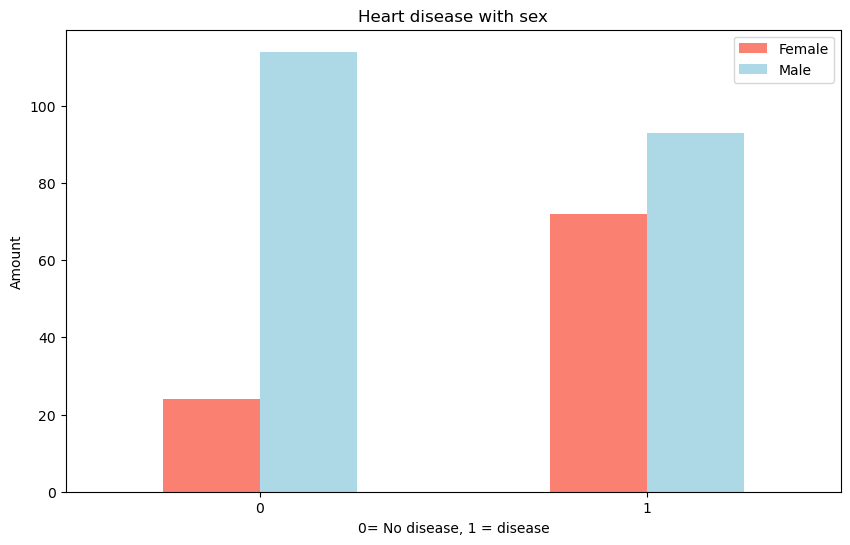

In [16]:
#create a plot

pd.crosstab(df.target,df.sex).plot(kind = "bar", figsize = (10,6), color = ["salmon","lightblue"])
plt.title("Heart disease with sex")

plt.xlabel("0= No disease, 1 = disease" )
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [ ]:
## AGE AND MAX HEART RATE

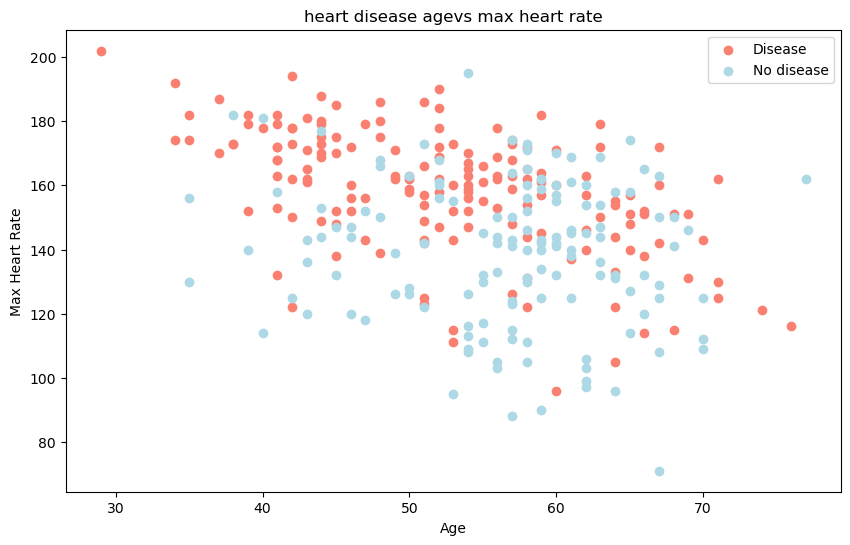

In [20]:
#Create a fig
plt.figure(figsize=(10,6))


#scatter.positiveexample
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c = "salmon")

##scatter negetive examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c = "lightblue")

## Add some info
plt.title("heart disease agevs max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No disease"]);

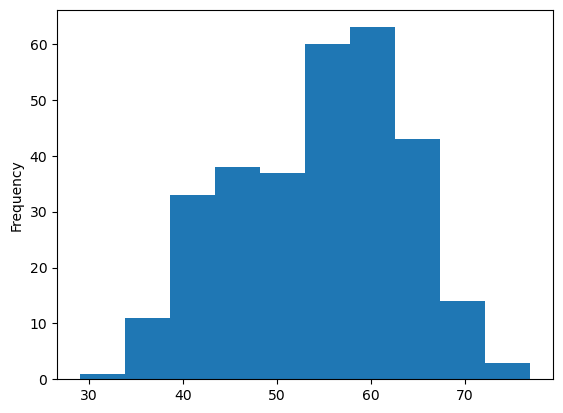

In [21]:
# check the distribution if age with histogram
df.age.plot.hist();

In [ ]:
#chest pain vs target

In [22]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


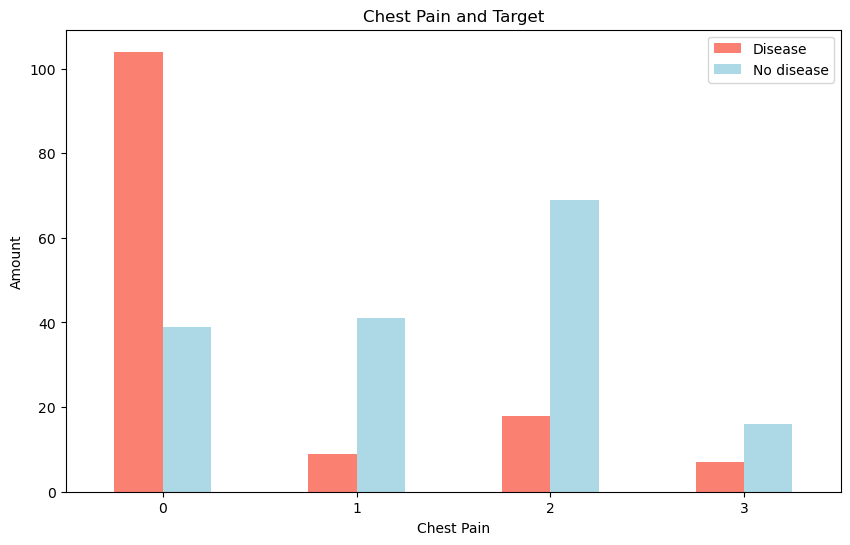

In [23]:
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize=(10,6),
                                 color = ["salmon","lightblue"])

plt.title("Chest Pain and Target")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["Disease","No disease"])
plt.xticks(rotation = 0);

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


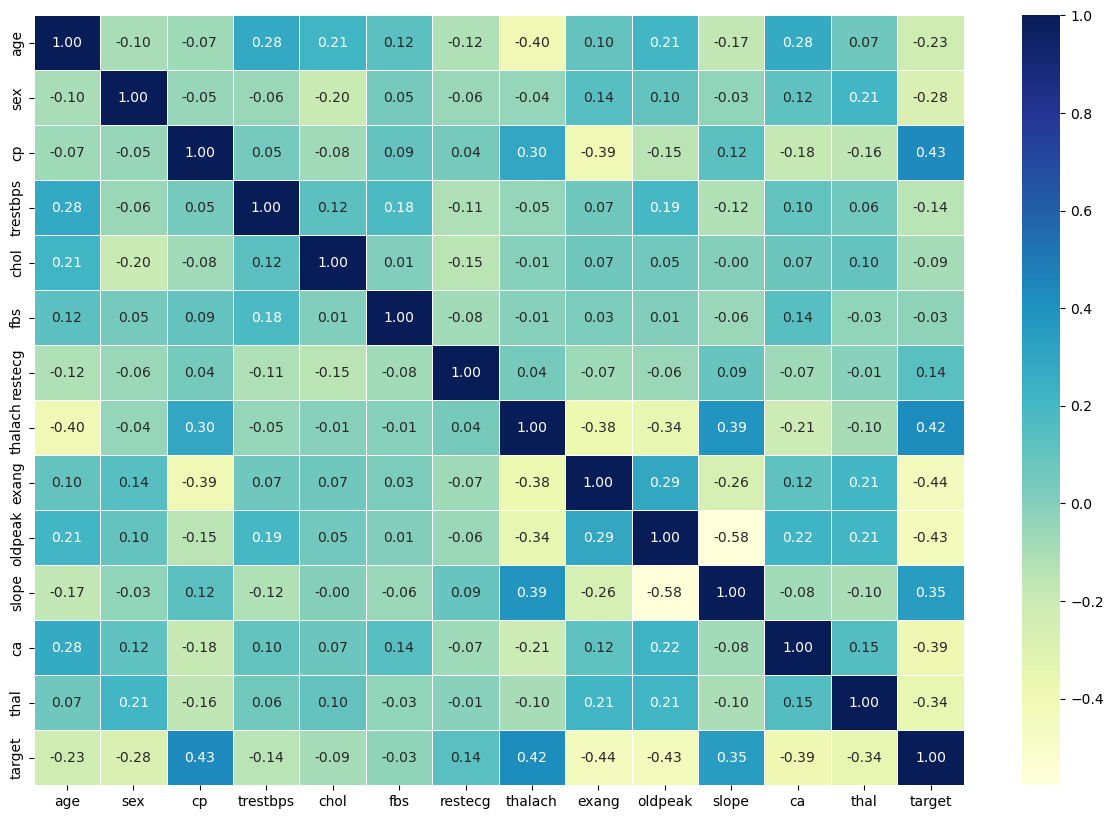

In [27]:
# lets make it a bit prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");



In [28]:
#exang vs target
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


## 5. Modelling

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
# Split data into X and y

X = df.drop("target",axis = 1)
y = df["target"]


In [31]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [33]:
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)




In [34]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [35]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

we are going to try 3  models:
1. K-nearest neighbours
2. Random forest classifiers
3. logistic regression

In [37]:
#put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given ml models
    models : a dict of diffferent ml models
    X_train : training data(no labels)
    X_test :testing data(no labels)
    y_train: training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    #Make a dic to keep model scores
    model_scores={}
    #Loop through models
    for name , model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model
        model_scores[name]= model.score(X_test,y_test)
    return model_scores

In [39]:
model_scores= fit_and_score(models,X_train,X_test,y_train,y_test)

/Users/takumi/Desktop/projects/git/heart-disease-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


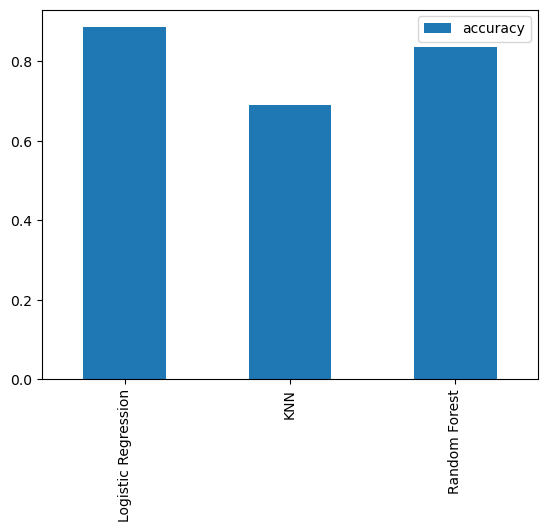

In [41]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Lets look at the following

1. Hyperparameter tuning
2. feature importance
3. confusion matrix
4. cross-validation
5. precision
6. recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under curve (AUC)

In [42]:
#1. hyperparameter tuning

#lets tune knn
train_scores = []
test_scores = []


#create a list of different values for n neighbours
neighbours = range(1,21)

#setup knn instance
knn= KNeighborsClassifier()

#Loop through different neighbours

for i in neighbours:
    knn.set_params(n_neighbors = i)
    #fit the model
    knn.fit(X_train,y_train)
    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))

Maximum kNN score on the test data : 75.41%


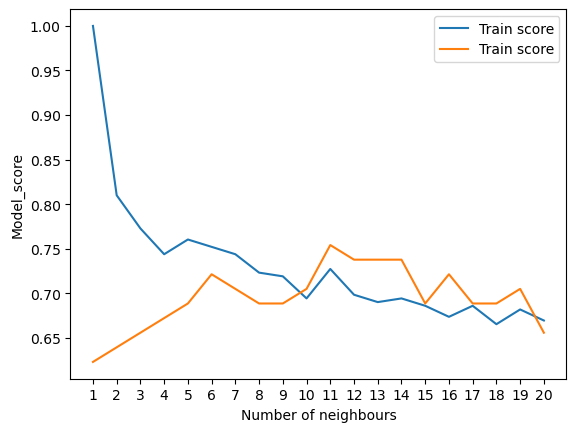

In [45]:
plt.plot(neighbours,train_scores,label = "Train score")
plt.plot(neighbours,test_scores,label = "Train score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model_score")
plt.legend()
print(f"Maximum kNN score on the test data : {max(test_scores)*100:.2f}%")

## hyper parameter tuning with randomised search cv

we are going to tune:
    
    LogisticRegression()
    RandomForestClassifier()
    
    ..... using RandomisedSearchCV

In [53]:
#create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}
#create hyperparameter grid for Randon forest classifier

rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

noe the grid is used to tune using Randoms search CV

In [50]:
#tune lr

np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#fir random hyperarameteer search model for lr
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [52]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [56]:
#now random classfier

np.random.seed(42)
#setup random hyperparameter search for Random Classifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
#find the best params

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [58]:
#Evaluate 
rs_rf.score(X_test,y_test)

0.8688524590163934

In [59]:
## now grid search cv for exhaustive search for logistic

log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}


#tune lr

np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [60]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
#evaluate the grid search model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [62]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [63]:
print("abc")

abc


## Evaluating our tunig machine learning classifier beyond accuracy 

* ROC curve and AUC score
* Cofusion matrix
* Classification Report
* Precision
* Recall
* F1 score


... and it would be great to use cross val where possible.


to make comparisions and evaluate our trained model first we need to make predictions.


In [65]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)


In [66]:
y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [67]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [70]:
c_m = confusion_matrix(y_test,y_preds)

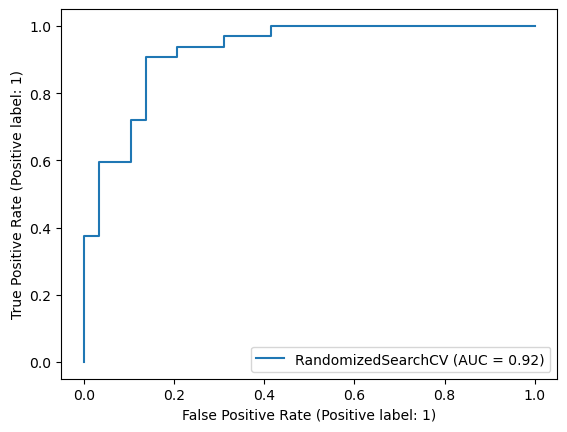

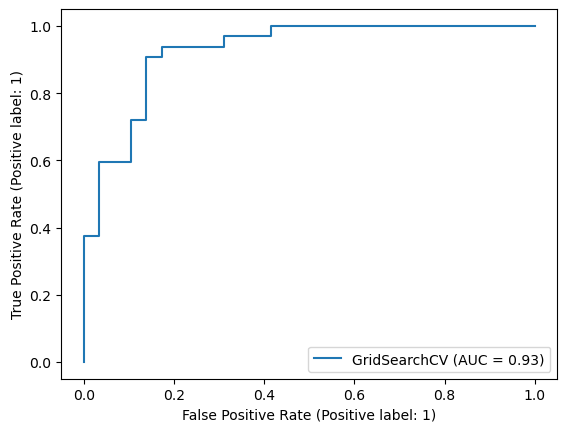

In [73]:
#Plot roc curve and calculate the auc metric

RocCurveDisplay.from_estimator(rs_log_reg, X_test,y_test)
RocCurveDisplay.from_estimator(gs_log_reg, X_test,y_test);

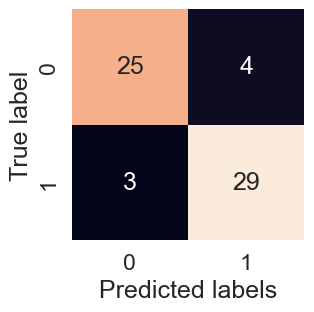

In [74]:
# Cpnfusion matrix
#visualize using seaborn
sns.set(font_scale= 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds), 
                    annot = True,
                    cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)
    
    
    

In [75]:
#lets get a clsssification report and cross validated precision, recall and f1_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# precision true positives rate no no false positives = 1
# recall no false negetives =1
#f1 - score combi of pres and recall
#support data set info
#macro avg avg between classes without class imbalance into account
#weighted avg avg between classes with class imbalance into account



In [76]:
# crossval use and calculate accuracy precision recall and f1 score we will use cross_val_score

#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [77]:
clf = LogisticRegression(C=0.20433597178569418,solver = "liblinear")

In [89]:
cv_acc = cross_val_score(clf, X,y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)

In [90]:
cv_prec = cross_val_score(clf, X,y,
                        cv=5,
                        scoring="precision")
cv_prec =np.mean(cv_prec)

In [91]:
cv_recall = cross_val_score(clf, X,y,
                        cv=5,
                        scoring="recall")
cv_recall =np.mean(cv_recall)

In [92]:
cv_f1= cross_val_score(clf, X,y,
                        cv=5,
                        scoring="f1")
cv_f1=np.mean(cv_f1)
    

<AxesSubplot: title={'center': 'Cross-validated clasification metrics'}>

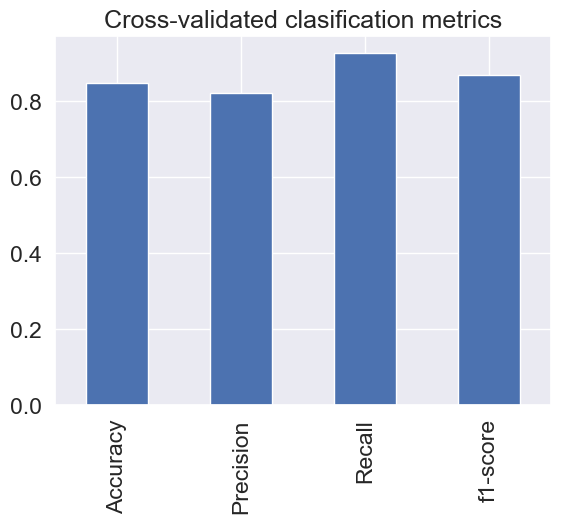

In [95]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_prec,
                          "Recall": cv_recall,
                          "f1-score":cv_f1},
                         index=[0]);

cv_metrics.T.plot.bar(title= "Cross-validated clasification metrics",
                     legend=False)

# Feature Importance


In [97]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
# fir an instance of LogisticRegresstion
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418,solver = "liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [99]:
#check coef
clf.coef_

array([[ 0.00316728, -0.86044681,  0.66067028, -0.01156993, -0.00166374,
         0.04386098,  0.31275871,  0.02459362, -0.60413098, -0.56862784,
         0.45051633, -0.63609911, -0.67663374]])

In [103]:
#match the features to colums
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031672836648050503,
 'sex': -0.8604468104930325,
 'cp': 0.6606702797887507,
 'trestbps': -0.01156993266606034,
 'chol': -0.0016637447948541165,
 'fbs': 0.043860983413115645,
 'restecg': 0.31275871271392713,
 'thalach': 0.024593615341531826,
 'exang': -0.6041309838702352,
 'oldpeak': -0.5686278420079321,
 'slope': 0.45051633355228077,
 'ca': -0.6360991091618156,
 'thal': -0.6766337375624075}

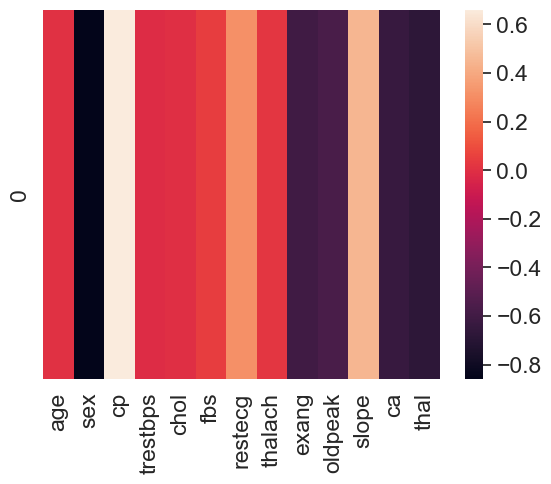

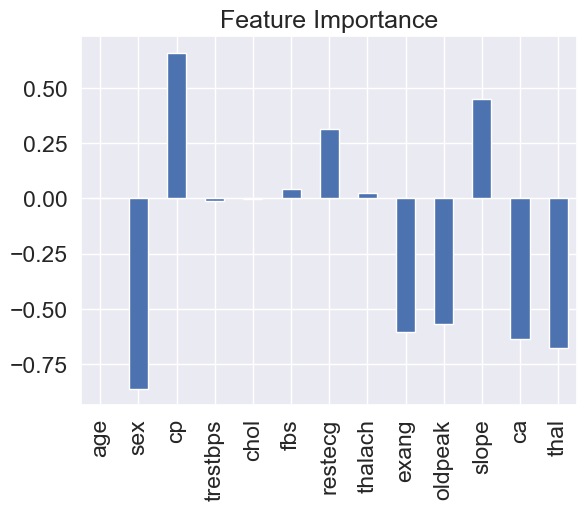

In [104]:
# visualize
feature_df =pd.DataFrame(features_dict, index = [0])
sns.heatmap(feature_df)
feature_df.T.plot.bar(title = "Feature Importance",legend = False);

In [106]:
# -ve  corelation value sex inc target dec
# +ve corelation value cp inc target inc


In [108]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [109]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. experimentation
 if you haven't got the target
    
    
    
    * more data?
    * better model? catboot or xgboost?
    * could we improve the current model?
    * how to export and share with othere